# 📊 Executive Summary

### 1️⃣ Premium Pricing Drives Revenue
Revenue shows strong correlation with Unit Price (0.72), indicating that higher-priced products significantly contribute to overall revenue. The business appears to follow a premium-driven model rather than a volume-based strategy.

### 2️⃣ Furniture is the Primary Profit Engine
Furniture generates the highest total profit while also maintaining strong revenue contribution, making it the company’s most valuable category.

### 3️⃣ Revenue is Stable & Diversified
Monthly revenue remains consistently between 20M–26M, with no extreme volatility. Additionally, revenue is evenly distributed across cities, reducing geographic dependency risk.

### 4️⃣ Discounts Have Limited Impact
Discount shows weak correlation with revenue (-0.10), suggesting that aggressive discounting is not the main driver of sales performance.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [36]:
df = pd.read_csv("data/Ecommerce_Sales_Data_2024_2025.csv")



In [37]:
df.shape
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   str    
 2   Customer Name  5000 non-null   str    
 3   Region         5000 non-null   str    
 4   City           5000 non-null   str    
 5   Category       5000 non-null   str    
 6   Sub-Category   5000 non-null   str    
 7   Product Name   5000 non-null   str    
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   str    
dtypes: float64(2), int64(4), str(8)
memory usage: 547.0 KB


In [38]:
df["Order Date"] = pd.to_datetime(df["Order Date"])


In [39]:
df["Order Date"].dtype


dtype('<M8[us]')

In [40]:
df[df["Quantity"] < 0].shape


(0, 14)

In [41]:
df[df["Unit Price"] < 0].shape


(0, 14)

In [42]:
df["Total_Revenue"] = df["Quantity"] * df["Unit Price"]


In [43]:
(df["Sales"] - df["Total_Revenue"]).sum()


np.float64(-59505064.65)

In [44]:
df["Calculated_Sales"] = (df["Quantity"] * df["Unit Price"]) - df["Discount"]

(df["Sales"] - df["Calculated_Sales"]).sum()


np.float64(-59454809.65)

In [45]:
df["Expected"] = df["Quantity"] * df["Unit Price"]

df[["Quantity", "Unit Price", "Sales", "Expected"]].head(10)


,Quantity,Unit Price,Sales,Expected
0,2,36294,68958.60,72588
1,1,42165,33732.00,42165
2,4,64876,207603.20,259504
3,5,37320,158610.00,186600
4,1,50037,45033.30,50037
5,5,40287,171219.75,201435
6,2,3636,6908.40,7272
7,1,15885,14296.50,15885
8,1,40834,32667.20,40834
9,2,16686,28366.20,33372


In [46]:
df["Expected_Final"] = (df["Quantity"] * df["Unit Price"]) * (1 - df["Discount"]/100)

(df["Sales"] - df["Expected_Final"]).sum()


np.float64(-2.9905322662671097e-10)

In [47]:
df["Total_Revenue"] = df["Sales"]


In [48]:
df["Order_Month"] = df["Order Date"].dt.to_period("M")


In [49]:
df["Price_Segment"] = df["Unit Price"].apply(
    lambda x: "Low" if x < 20000 else ("Medium" if x < 50000 else "High")
)


In [50]:
df["Price_Segment"].value_counts()


Price_Segment
Medium    1942
High      1834
Low       1224
Name: count, dtype: int64

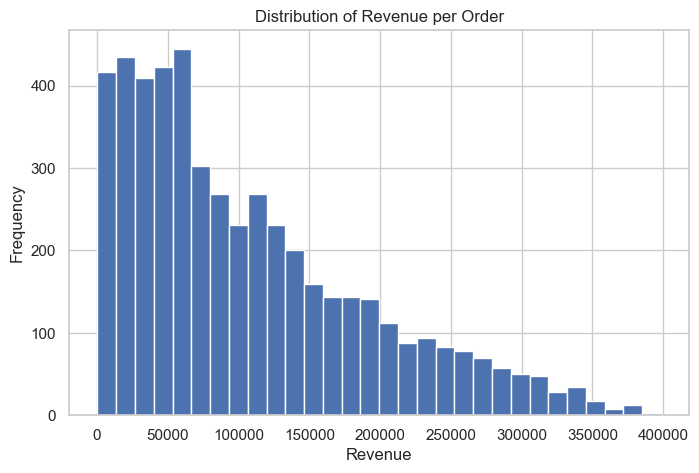

In [51]:
plt.figure(figsize=(8,5))
plt.hist(df["Total_Revenue"], bins=30)
plt.title("Distribution of Revenue per Order")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


### Insight:
The revenue distribution is right-skewed, indicating that the business relies primarily on a high volume of small-to-medium value orders rather than a few extremely large transactions.

### Business Impact:
This suggests a stable and diversified revenue stream. Customer acquisition and retention strategies should focus on increasing order frequency rather than targeting only high-value customers.


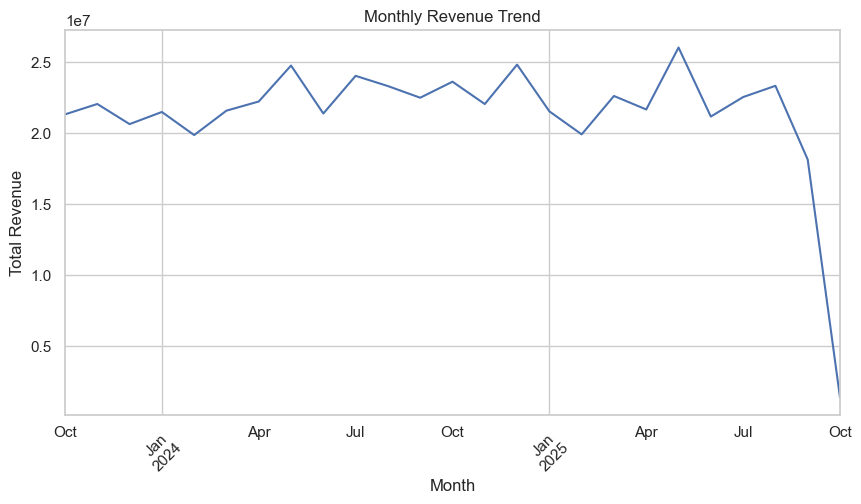

In [52]:
monthly_rev = df.groupby("Order_Month")["Total_Revenue"].sum()

plt.figure(figsize=(10,5))
monthly_rev.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


### Insight:
Monthly revenue remains relatively stable between 20M–26M, indicating consistent demand throughout the year.

### Anomaly:
The sharp drop in the final month likely represents incomplete data rather than actual business decline.

### Business Impact:
Stable revenue suggests predictable cash flow, allowing better inventory and operational planning.


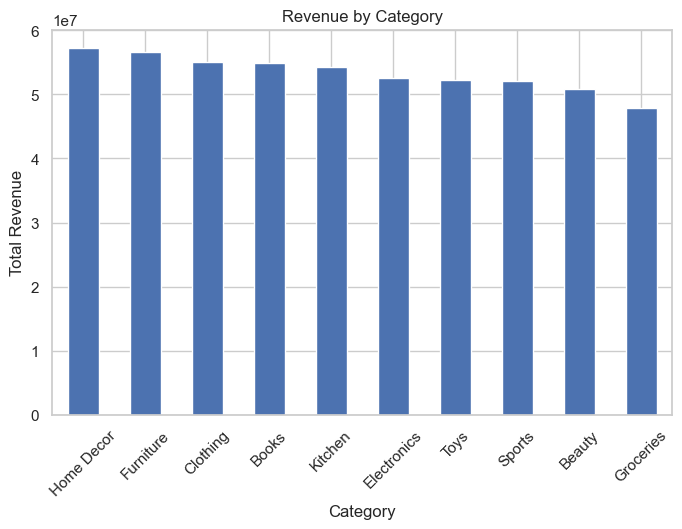

Category
Home Decor     57233222.35
Furniture      56647187.90
Clothing       55053908.30
Books          54932643.00
Kitchen        54227902.30
Electronics    52587883.95
Toys           52227366.45
Sports         52069397.25
Beauty         50803409.70
Groceries      47883103.15
Name: Total_Revenue, dtype: float64

In [53]:
category_rev = df.groupby("Category")["Total_Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_rev.plot(kind="bar")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

category_rev


### Insight:
Revenue is relatively evenly distributed across categories, indicating a diversified product portfolio.

### Observation:
Home Decor and Furniture generate the highest revenue, while Groceries and Beauty contribute slightly less.

### Business Impact:
The business is not overly dependent on a single category, reducing operational risk.


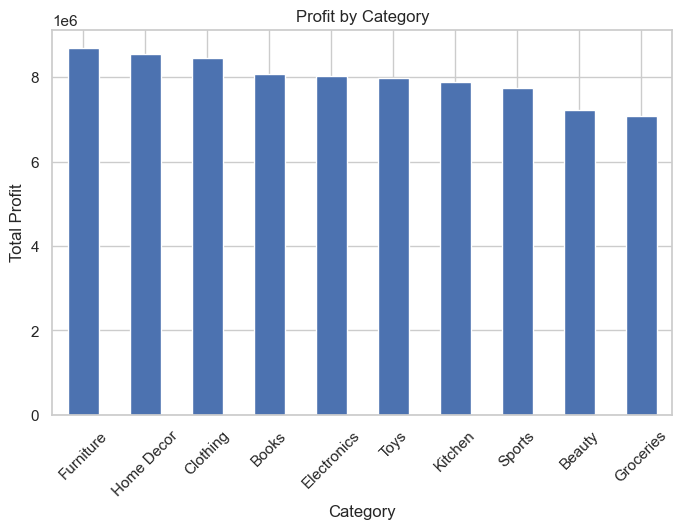

Category
Furniture      8693087.03
Home Decor     8556846.94
Clothing       8445750.29
Books          8076273.29
Electronics    8042133.88
Toys           7986871.44
Kitchen        7879573.29
Sports         7739430.04
Beauty         7213436.07
Groceries      7075332.64
Name: Profit, dtype: float64

In [54]:
category_profit = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_profit.plot(kind="bar")
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

category_profit


### Insight:
Furniture generates the highest profit, making it the most valuable category for the business.

### Concern:
Groceries and Beauty generate comparatively lower profit, indicating thin margins or pricing inefficiencies.

### Business Impact:
Marketing and inventory focus should prioritize high-profit categories like Furniture and Home Decor, while cost optimization strategies should be explored for Groceries.


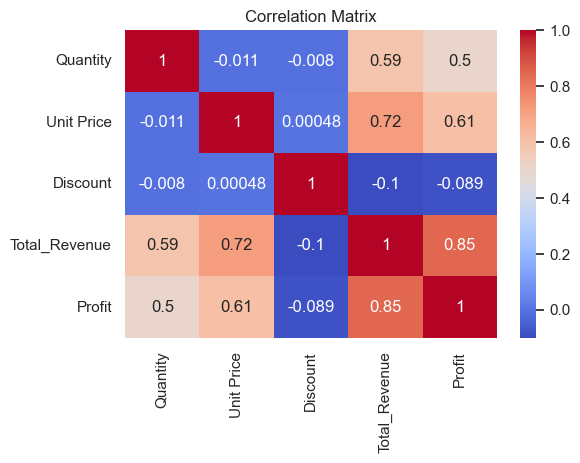

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Quantity","Unit Price","Discount","Total_Revenue","Profit"]].corr(),
            annot=True,
            cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Insight:
Revenue shows strong positive correlation with Unit Price (0.72), indicating that premium pricing significantly drives revenue.

### Observation:
Discount has minimal impact on revenue (-0.10), suggesting the business is not heavily discount-driven.

### Business Implication:
The company appears to operate successfully under a premium pricing model rather than competing aggressively on discounts.


In [56]:
city_rev = df.groupby("City")["Total_Revenue"].sum().sort_values(ascending=False)

city_cum = city_rev.cumsum() / city_rev.sum() * 100

pareto_df = pd.DataFrame({
    "Revenue": city_rev,
    "Cumulative %": city_cum
})

pareto_df.head(15)


,Revenue,Cumulative %
City,,
Bangalore,29989840.85,5.619590
Lucknow,29901483.40,11.222623
Guwahati,29606888.90,16.770454
Chandigarh,29331057.35,22.266598
Jaipur,29319402.90,27.760559
Amritsar,28746184.20,33.147109
Surat,28532934.65,38.493699
Patna,27702815.20,43.684739
Bhubaneswar,27088786.45,48.760720


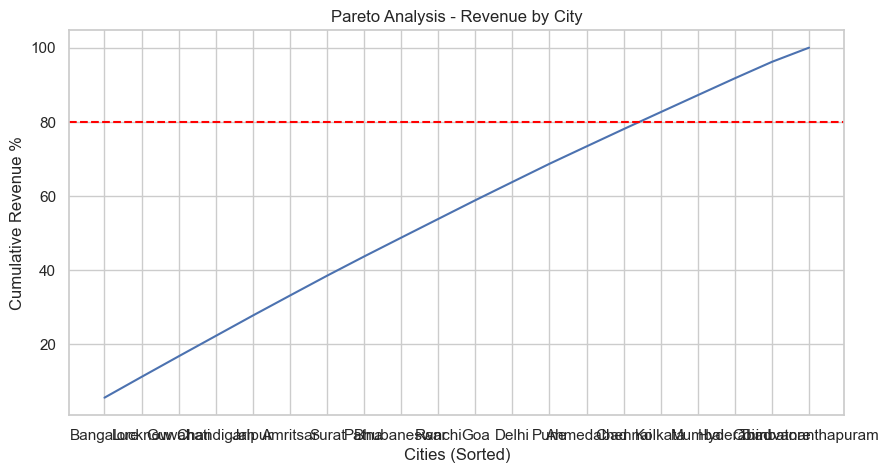

In [57]:
plt.figure(figsize=(10,5))
plt.plot(pareto_df["Cumulative %"])
plt.axhline(80, color="red", linestyle="--")
plt.title("Pareto Analysis - Revenue by City")
plt.xlabel("Cities (Sorted)")
plt.ylabel("Cumulative Revenue %")
plt.show()


### Insight:
Revenue distribution across cities does not follow a strict 80/20 Pareto pattern. Approximately 75–80% of cities are required to generate 80% of total revenue.

### Business Implication:
The company’s revenue is geographically diversified, reducing dependency risk on a few high-performing cities.

### Strategic Direction:
Balanced inventory and marketing allocation across regions is recommended rather than focusing solely on top metropolitan cities.


# 🎯 Final Strategic Recommendation

1. Focus marketing investment on Furniture and Home Decor.
2. Optimize pricing strategy for Groceries and Beauty.
3. Maintain premium positioning instead of heavy discounting.
4. Continue balanced regional allocation of inventory.
